# **Data Import**

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **Exploratory Data Analysis**

Text(0, 0.5, 'Number of Data points')

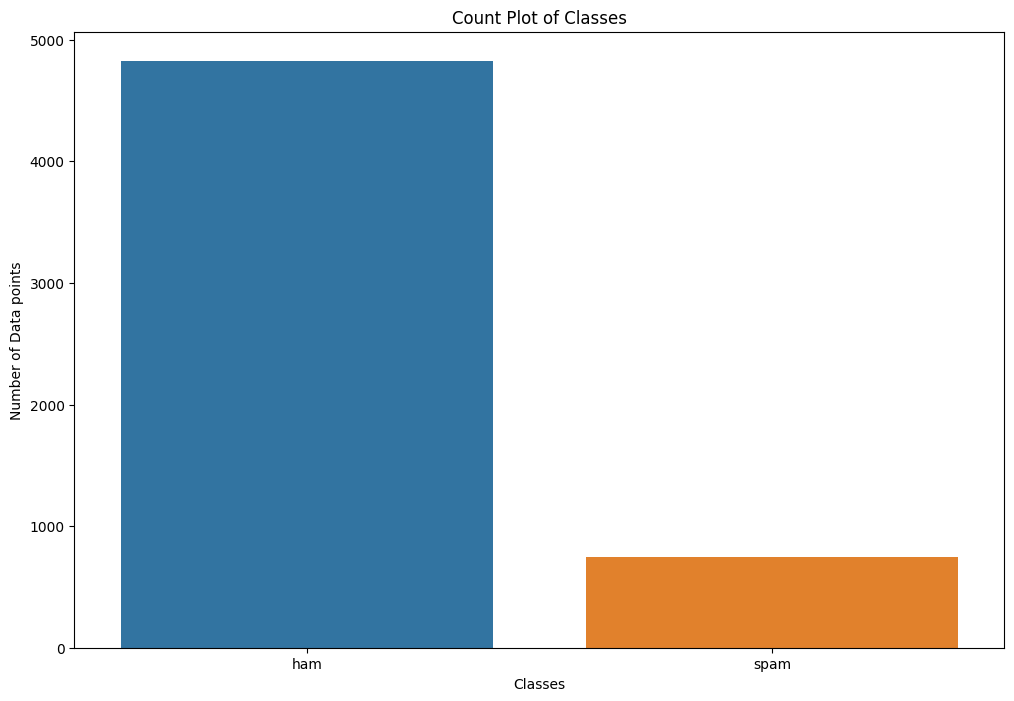

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#Check the number of data
plt.figure(figsize=(12,8))
fg = sns.countplot(x= data["v1"])
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Number of Data points")

# **Data Preprocessing**

In [4]:
#Removing empty columns
data = data[['v1', 'v2']]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
import string

def remove_special_characters(word):
    return word.translate(str.maketrans('', '', string.punctuation))

data["no_punctuation"] = data["v2"].apply(remove_special_characters)
data.head()

,v1,v2,no_punctuation
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [6]:
from sklearn.preprocessing import LabelEncoder
#Label encode the results to 0 and 1
label_encoder = LabelEncoder()
data["v1"] = label_encoder.fit_transform(data["v1"])
y = data["v1"]
data.head()

,v1,v2,no_punctuation
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [7]:
from sklearn.model_selection import train_test_split
#Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(data["no_punctuation"], y, test_size=0.2, random_state=42)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# **Model Building**

Naive Bayes

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.967713004484305
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9713004484304932
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



Support Vector Machine

In [11]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.9802690582959641
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



K-Nearest-Neighbor

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9121076233183857
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       965
           1       1.00      0.35      0.51       150

    accuracy                           0.91      1115
   macro avg       0.95      0.67      0.73      1115
weighted avg       0.92      0.91      0.89      1115



XGBooost

In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.957847533632287
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       965
           1       0.93      0.74      0.83       150

    accuracy                           0.96      1115
   macro avg       0.95      0.87      0.90      1115
weighted avg       0.96      0.96      0.96      1115



Neural Network

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

model.summary()

2025-05-01 11:06:12.994936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746097573.293312      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746097573.373906      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-01 11:06:29.357966: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │       1,039,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,047,937 (4.00 MB)

 Trainable params: 1,047,937 (4.00 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int).flatten()

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - Precision: 0.1442 - Recall: 0.1046 - accuracy: 0.8111 - loss: 0.6203 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8655 - val_loss: 0.3193
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8682 - loss: 0.2660 - val_Precision: 1.0000 - val_Recall: 0.1067 - val_accuracy: 0.8798 - val_loss: 0.1832
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - Precision: 0.9988 - Recall: 0.3871 - accuracy: 0.9116 - loss: 0.1573 - val_Precision: 0.9758 - val_Recall: 0.8067 - val_accuracy: 0.9713 - val_loss: 0.1181
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - Precision: 0.9969 - Recall: 0.9141 - accuracy: 0.9884 - loss: 0.0706 - val_Precision: 0.9559 - val_Recall: 0.8667 - val_accuracy: 0.9767 - val_loss: 0.0727
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - Precision: 0.9990 - Recall: 0.9863 - accuracy: 0.9980 - loss: 0.0233 - val_Precision: 0.9632 - 

# **Model Comparison**

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Naive Bayes' : y_pred_nb,
    'Random Forest' : y_pred_rf,
    'SVM' : y_pred_svm,
    'KNN' : y_pred_knn,
    'XGBoost' : y_pred_xgb,
    'Neural Network' : y_pred_nn
}

results = []
for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    results.append([name, acc, precision, recall, f1])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
print(results_df.sort_values('F1', ascending=False))

            Model  Accuracy  Precision    Recall        F1
2             SVM  0.980269   0.977612  0.873333  0.922535
5  Neural Network  0.978475   0.963235  0.873333  0.916084
1   Random Forest  0.971300   1.000000  0.786667  0.880597
0     Naive Bayes  0.967713   1.000000  0.760000  0.863636
4         XGBoost  0.957848   0.932773  0.740000  0.825279
3             KNN  0.912108   1.000000  0.346667  0.514851


In [17]:
from joblib import dump

dump(model, 'spam_classifier_nn.joblib')
dump(vectorizer, 'input_vectorizer.joblib')

['input_vectorizer.joblib']

In [18]:
import tensorflow as tf
print(tf.__version__)

2.18.0
